# HSE Python Project: Creating a Stock Market porfolio

by: Iskander Sergazin

Introduction: The idea behind my project was to analyze S&P 500 Financial Data from https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information to try and create a website which would recommend a stock market porfolio. I was inspired to take up this project by the book: The Intelligent Investor. Algorithms created implement Benjamin Grahams methods as a framework, to design sn efficient way to recommend a stock portfolio. The aim of my project is to remove the human effort behind the process of selecting a stocks.

Functions Used:

In [1]:
def Quartile25(x):
    return x.quantile(0.25)
def Quartile75(x):
    return x.quantile(0.75)
def Interquartilerange(x):
    return x.quantile(0.75) - x.quantile(0.25)
#Functions to have a clean table (with caps) 
def Mean(x):
    return x.mean()
def Median(x):
    return x.median()
def StDeviation(x):
    return x.std()

# Initial Data & Set-up:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('financials.csv')
data = data.rename(columns={'Price/Earnings':'Price_Earnings_Ratio','Earnings/Share':'Earnings_Share_Ratio','Dividend Yield':'Dividend_Yield','52 Week Low':'52_Week_Low','52 Week High':'52_Week_High','Market Cap':'Market_Cap','Price/Sales':'Price_Sales_Ratio','Price/Book':'Price_Book_Ratio'})
dp = data.drop(['SEC Filings','EBITDA','52_Week_Low','52_Week_High','Symbol'],axis=1)

In [3]:
data.corr()

,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,52_Week_Low,52_Week_High,Market_Cap,EBITDA,Price_Sales_Ratio,Price_Book_Ratio
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price_Earnings_Ratio,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend_Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings_Share_Ratio,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52_Week_Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52_Week_High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market_Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price_Sales_Ratio,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price_Book_Ratio,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000


In [4]:
dp.head(10)

,Name,Sector,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,Market_Cap,Price_Sales_Ratio,Price_Book_Ratio
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,2.604117,10.62
5,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,5.251867e+10,10.595120,5.16
6,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,6.242378e+09,1.795347,3.55
7,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,9.455021e+10,13.092818,11.06
8,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,8.123612e+09,1.130106,2.51
9,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,1.119166e+10,2.109195,21.47


In [5]:
dp.tail(20)

,Name,Sector,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,Market_Cap,Price_Sales_Ratio,Price_Book_Ratio
485,Wells Fargo,Financials,55.40,13.58,2.711158,4.07,2.814636e+11,2.872819,1.58
486,Welltower Inc.,Real Estate,54.67,12.74,6.153846,2.81,2.094368e+10,6.725218,1.49
487,Western Digital,Information Technology,80.09,10.19,2.389201,1.29,2.476030e+10,1.245503,2.00
488,Western Union Co,Information Technology,18.81,10.17,3.591585,0.51,8.951609e+09,2.226770,12.65
489,WestRock Company,Materials,60.93,23.26,2.669978,2.77,1.643334e+10,1.075785,1.58
490,Weyerhaeuser Corp.,Real Estate,33.60,34.29,3.707995,0.77,2.607030e+10,3.639679,2.90
491,Whirlpool Corp.,Consumer Discretionary,164.95,11.77,2.565299,4.51,1.217792e+10,0.580648,2.57
492,Williams Cos.,Energy,28.56,48.41,4.000000,-0.57,2.480240e+10,4.298285,3.01
493,Willis Towers Watson,Financials,152.36,18.67,1.347058,3.07,2.078027e+10,3.448466,2.10
494,Wyndham Worldwide,Consumer Discretionary,113.56,18.77,1.954178,5.53,1.199384e+10,2.733208,18.91


From the initial data, it is evident that there is either weak or no correlation between the data variables.

During my data preprocessing, I have removed 'Symbol', 'SEC Filings', 'EBITDA', '52 Week High' and 'Lows' because they were irrelevant for my field of study and will not be used throughout the project.

# Task 1:

Task 1: For the first part of the project it was decided to compare two families of data analysis methods, 'mean & standard deviation' with 'median & interquartile range (IQR)'. This will give some key insights about the data faced, as well as allow to choose the most appropriate plot type with regards to the spread of the data. 

*Please refer to functions.py for the functions used

In [6]:
dp.agg([Mean,StDeviation,Median,Quartile25,Quartile75,Interquartilerange]).round(2)

,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,Market_Cap,Price_Sales_Ratio,Price_Book_Ratio
Mean,103.83,24.81,1.90,3.75,4.923944e+10,3.94,14.45
StDeviation,134.43,41.24,1.54,5.69,9.005017e+10,3.46,89.66
Median,73.92,19.45,1.77,2.89,2.140095e+10,2.90,3.40
Quartile25,46.25,15.35,0.79,1.49,1.273207e+10,1.63,2.02
Quartile75,116.54,25.75,2.78,5.14,4.511968e+10,4.70,6.11
Interquartilerange,70.29,10.40,1.99,3.65,3.238761e+10,3.07,4.09


From the table, it is evident that metrics which the project is aimed to focus on, namely: 'Price_Earnings_Ratio', and 'Book Value' are unevenly distributed. The high standard deviation suggests extreme value 'outliers' within the data. To confirm this trend, boxplots will be used in the following task. 

# Task 2:

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'S&P 500 EPS Boxplot')]

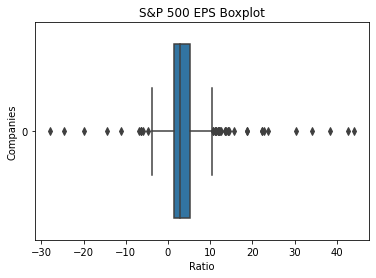

In [7]:
sns.boxplot(data = dp.Earnings_Share_Ratio, orient = 'h').set(
    xlabel='Ratio',
    ylabel = 'Companies',
    title='S&P 500 EPS Boxplot')

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'S&P 500 PER Boxplot')]

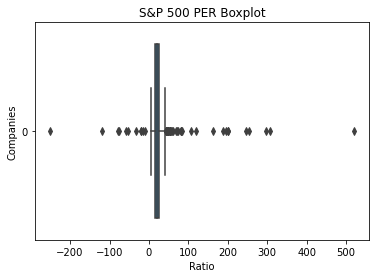

In [8]:
sns.boxplot(data = dp.Price_Earnings_Ratio, orient = 'h').set(
    xlabel='Ratio',
    ylabel = 'Companies',
    title='S&P 500 PER Boxplot')

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'S&P 500 PSR Boxplot')]

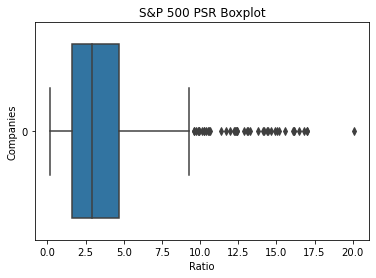

In [9]:
sns.boxplot(data = dp.Price_Sales_Ratio,orient = 'h').set(
    xlabel='Ratio',
    ylabel = 'Companies',
    title='S&P 500 PSR Boxplot')

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'S&P 500 BV Boxplot')]

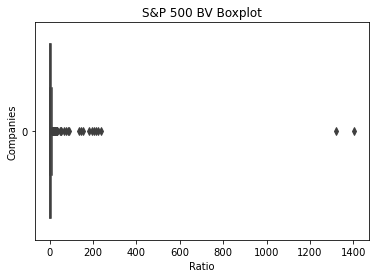

In [10]:
sns.boxplot(data = dp.Price_Book_Ratio,orient = 'h' ).set(
    xlabel='Ratio',
    ylabel = 'Companies',
    title='S&P 500 BV Boxplot')

As predicted, boxplots show that there are many values which do not fit in with the general trend. The 'Price_Book_Ratio' boxplot is unclear, due to the existence of extreme data points. These data points will not be used for the stock portfolio, because the existence of extreme values, could be a signal of overspeculation or an unhealthy management type. Therefore, it was decided to filter these data points.

Method for filtering: 
I will be using my median and IQR data to identify boundaries and remove data points above and below the voundary. The formula to identify an outlier will be (Q1-1.5*IQR or Q3+1.5*IQR).
Source: https://www.simplypsychology.org/boxplots.html

The project will mainly focus on PER(Price_Earnings_Ratio) and BV('Price_Book_Ratio'), as recommended in the book 'The Intelligent Investor', therefore only the outliers for these two parameters will be removed. 

Filtering Code:

In [11]:
groups = dp.groupby('Sector')
#Removing Sector wise above PER outliers:
filtered_df = groups.apply(lambda x: x[x['Price_Earnings_Ratio']<= Quartile75(x['Price_Earnings_Ratio'])+1.5*Interquartilerange(x['Price_Earnings_Ratio'])])
len(filtered_df)

#Removing sector wise below PER outliers:
filtered_df=filtered_df.reset_index(drop=True)
filtered_df
groups = filtered_df.groupby('Sector')
filtered_df = groups.apply(lambda x: x[x['Price_Earnings_Ratio']>= Quartile25(x['Price_Earnings_Ratio'])-1.5*Interquartilerange(x['Price_Earnings_Ratio'])])














#Same operation for Price Book Ratio(BV):
filtered_df=filtered_df.reset_index(drop=True)
groups = filtered_df.groupby('Sector')
filtered_df = groups.apply(lambda x: x[x['Price_Book_Ratio']>= Quartile25(x['Price_Book_Ratio'])-1.5*Interquartilerange(x['Price_Book_Ratio'])])

filtered_df=filtered_df.reset_index(drop=True)
filtered_df
groups = filtered_df.groupby('Sector')
filtered_df = groups.apply(lambda x: x[x['Price_Book_Ratio']<= Quartile75(x['Price_Book_Ratio'])+1.5*Interquartilerange(x['Price_Book_Ratio'])])

filtered_df=filtered_df.reset_index(drop=True)

# print(len(dp)-len(filtered_df))

Through the process, my algorithms identified and removed 89 companies, which were considered extreme outliers with regards to the data. 

# Task 1.1:

It was decided to observe the changes in the descriptive statistics of the data.  

In [12]:
filtered_df.agg([Mean,StDeviation,Median,Quartile25,Quartile75,Interquartilerange]).round(2)

,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,Market_Cap,Price_Sales_Ratio,Price_Book_Ratio
Mean,95.43,20.06,2.00,3.80,4.854133e+10,3.61,3.94
StDeviation,122.81,9.76,1.56,5.19,9.132919e+10,3.05,2.78
Median,70.44,18.76,1.88,2.92,2.093459e+10,2.79,3.09
Quartile25,44.21,15.03,0.94,1.65,1.246911e+10,1.57,1.95
Quartile75,110.42,23.50,2.90,5.09,4.403040e+10,4.44,5.14
Interquartilerange,66.21,8.47,1.96,3.44,3.156128e+10,2.87,3.20


From the table it is evident that we have managed to significantly reduce PER and BV StDeviation. This effect can further be observed in the grouped boxplots. 

# Task 2.1:

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'S&P 500 PSR and PBR Boxplot')]

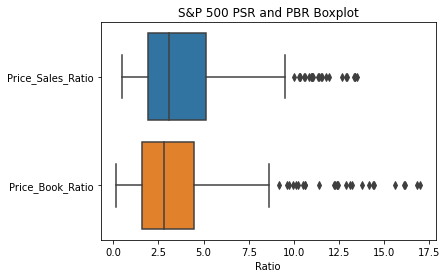

In [13]:
table = filtered_df
table = pd.concat([table.Price_Book_Ratio, table.Price_Sales_Ratio], axis=0)
table.index=range(table.shape[0])

table = pd.DataFrame(table)
table['name']= ''

table.loc[:table.shape[0]//2,'name']='Price_Sales_Ratio'
table.loc[table.shape[0]//2:,'name']='Price_Book_Ratio'


# table.loc[:table.shape[0]//2]
table
sns.boxplot(data = table, x=0, y='name', orient='h').set(
    xlabel='Ratio',
    ylabel='',
    title='S&P 500 PSR and PBR Boxplot')

[Text(0.5, 0, 'Ratio'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'S&P 500 PER and ESR Boxplot')]

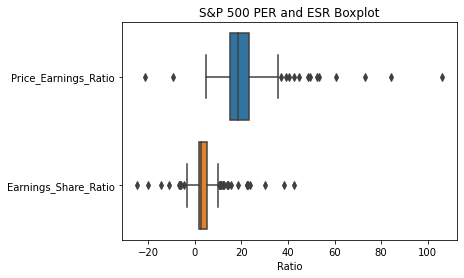

In [14]:
table = filtered_df
table = pd.concat([table.Price_Earnings_Ratio,table.Earnings_Share_Ratio], axis=0)
table.index=range(table.shape[0])

table = pd.DataFrame(table)
table['name']= ''

table.loc[:table.shape[0]//2,'name']='Price_Earnings_Ratio'
table.loc[table.shape[0]//2:,'name']='Earnings_Share_Ratio'

# table.loc[:table.shape[0]//2]
table
sns.boxplot(data = table, x=0, y='name', orient='h').set(
    xlabel='Ratio',
    ylabel='',
    title='S&P 500 PER and ESR Boxplot')

Conclusions: 
By the grouped boxplots, an observation was made that PER behaves similarly to ESR(Earnings_Share_Ratio), on the other hand, BV has similar distribution to PSR(Price_Sales_Ratio). This confirms the applicability of just PER and BV for the choice of a stock portfolio. Furthermore, due to the decreased stndard deviation, more graphical methods such as the hstogram have become available for the analysis of the data. 

# Task 3, part 1:

For task 3, my project will try to make two comparisons: Sector & Dsitribution of PER & BV and Sector & Market Cap. The project will address the following questions: 

- What is the correlation between Total Market Capitalization of a sector and Sector Size(number of companies present in the sector)? 

- What is the distribution of PER and BV within each sector? Is there a sector-wise variation, or is the behaviour similar between the two variables ? 

Part 1, was the attempt to answer these questions with unfiltered data:

In [15]:
'''Activate the cells below with caution /take a long time to execute/'''
dp3 = dp[['Sector','Price_Earnings_Ratio']]
dp3["Range"]=pd.cut(dp3.Price_Earnings_Ratio,range(int(dp3.Price_Earnings_Ratio.min()),int(dp3.Price_Earnings_Ratio.max()),2))
dp3["Count"]=1
dp4 = dp3.drop('Price_Earnings_Ratio',1).groupby(["Sector","Range"],
                                                 as_index=False).sum()

<ipython-input-15-1c4f487666d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp3["Range"]=pd.cut(dp3.Price_Earnings_Ratio,range(int(dp3.Price_Earnings_Ratio.min()),int(dp3.Price_Earnings_Ratio.max()),2))
<ipython-input-15-1c4f487666d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp3["Count"]=1


In [16]:
dp3 = dp[['Sector','Price_Earnings_Ratio']]
dp3["Range"]=pd.cut(dp3.Price_Earnings_Ratio,range(int(dp3.Price_Earnings_Ratio.min()),int(dp3.Price_Earnings_Ratio.max()),2))
dp3["Count"]=1
dp4 = dp3.drop('Price_Earnings_Ratio',1).groupby(["Sector","Range"],as_index=False).count()

<ipython-input-16-2e9e0853feeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp3["Range"]=pd.cut(dp3.Price_Earnings_Ratio,range(int(dp3.Price_Earnings_Ratio.min()),int(dp3.Price_Earnings_Ratio.max()),2))
<ipython-input-16-2e9e0853feeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp3["Count"]=1


Text(0.5, 0.98, 'PER Distribution by Sector (combined)')

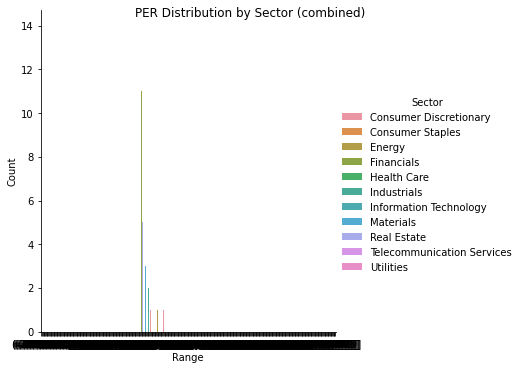

In [17]:
sns.catplot(x = "Range",      
            y = "Count",       
            hue = "Sector",  
            data = dp4,
            kind = "bar").fig.suptitle('PER Distribution by Sector (combined)')

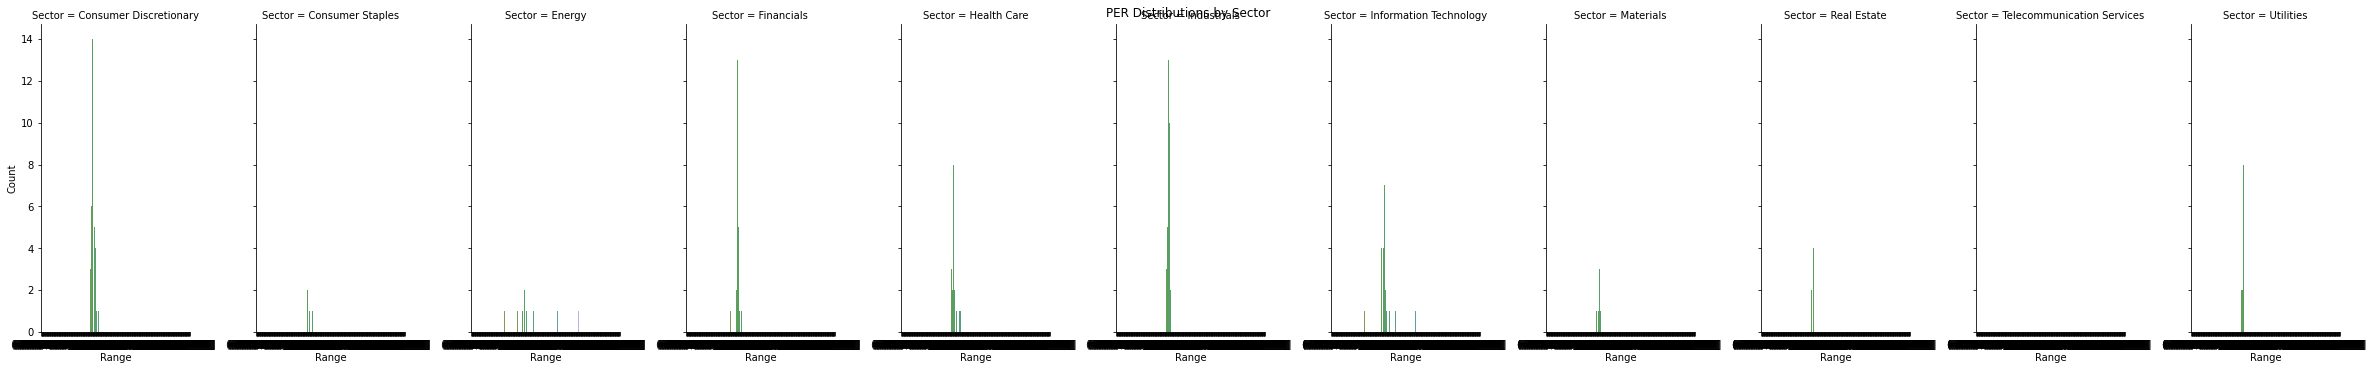

In [18]:
g = sns.catplot(y="Count", x="Range", col="Sector",
data=dp4, saturation=.5,
kind="bar", ci=None, aspect=.6).fig.suptitle('PER Distributions by Sector')

From the graphs it is visible that the extreme anomaly values present graphs which are difficult to analyse and draw conclusions from. Therefore, it was decided to use the fitlered data for the same purpose.

# Task 3, part 1.1:

Histogram for all sectors:

Text(0.5, 1.0, 'PER Histogram by Sector (combined)')

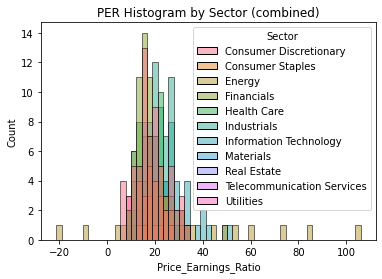

In [19]:
sns.histplot(data=filtered_df, x='Price_Earnings_Ratio', hue='Sector').set_title('PER Histogram by Sector (combined)')

From the histogram it can be hypothesized that some sectors will follow a  normal disitrbution. Therefore sector-wise histograms will be presented:

Text(0.5, 0.98, 'PER Distribution by Sector')

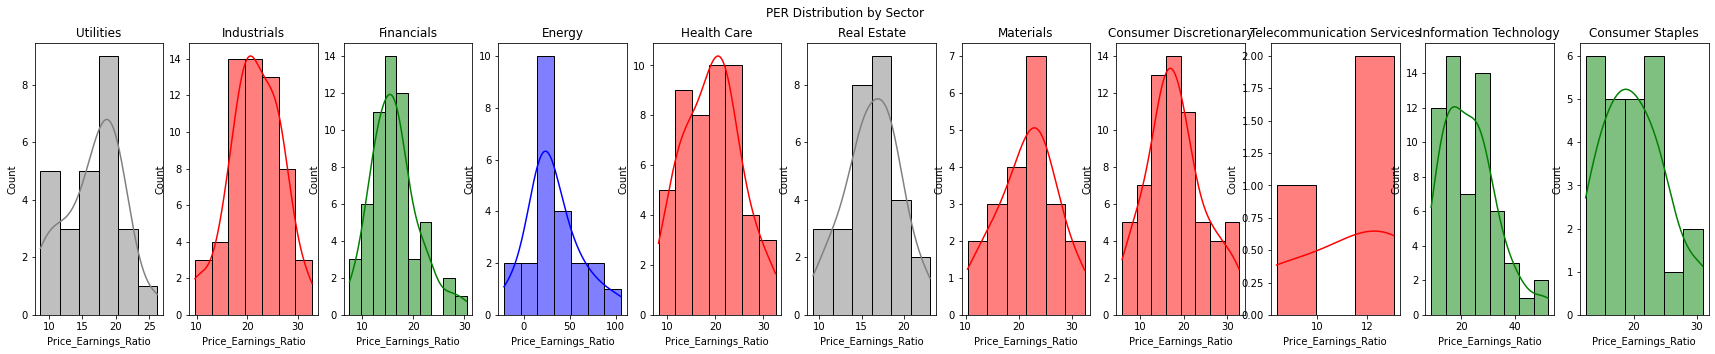

In [20]:
import random
colours = ['green','grey','blue', 'red','purple']

fig,axis=plt.subplots(1,11, figsize=(30,5))
counter = 0
for i in set(filtered_df.Sector):
    sns.histplot(ax = axis[counter], data=filtered_df[filtered_df.Sector==i],
                 x='Price_Earnings_Ratio', color=random.choice(colours), kde=True, legend=i)
    axis[counter].set_title(i)
    counter+=1
fig.suptitle('PER Distribution by Sector')

As hypothesized, all sectors besides the telecommunications, information technology and consumer staples follow a normal dsitribution. Whereas, the mean value for each sector is slightly different. Therefore, in choosing a stock market portfolio, my project will consider sector-wise PER. 

Text(0.5, 0.98, 'BV Distribution by Sector')

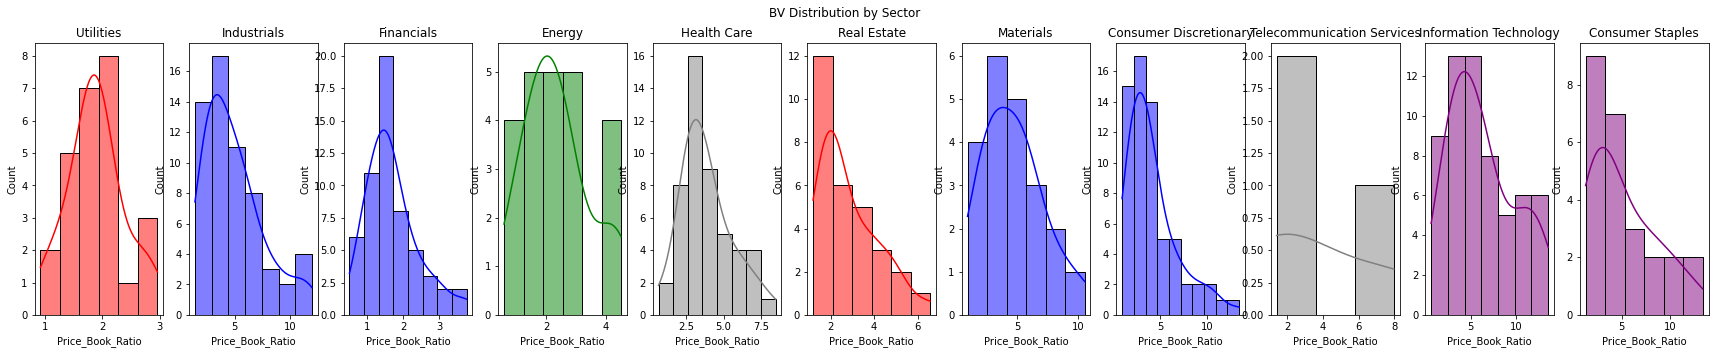

In [21]:
import random
colours = ['green','grey','blue', 'red','purple']

fig,axis=plt.subplots(1,11, figsize=(30,5))
counter = 0
for i in set(filtered_df.Sector):
    sns.histplot(ax = axis[counter], data=filtered_df[filtered_df.Sector==i],
                 x='Price_Book_Ratio', color=random.choice(colours), kde=True, legend=i)
    axis[counter].set_title(i)
    counter+=1
fig.suptitle('BV Distribution by Sector')

Nonetheless, from the BV it is visible that some sectors are skewed towards a higher BV. This suggests that for sectors such as 'Consumer Discretionary', higher BV companies can be considered.

# Task 3, part 2:

In this part, I will look at correlations between market cap and sector size:

In [22]:
q3p2 = data.Sector.value_counts()

In [23]:
q3p2 = data.Sector.value_counts()
dq3 = dp[['Sector','Market_Cap']]
dq3['intM_C']=dq3.Market_Cap.fillna(dq3.Market_Cap.mean()).apply(lambda x:  round(x))
dq3 = dq3.drop('Market_Cap',1).groupby(['Sector'],as_index=True).sum()
dq3['ValueCounts']=q3p2

<ipython-input-23-19159cb30438>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dq3['intM_C']=dq3.Market_Cap.fillna(dq3.Market_Cap.mean()).apply(lambda x:  round(x))


Text(0.5, 1.0, 'S&P500 Market Capitalization Pie Chart (by sector)')

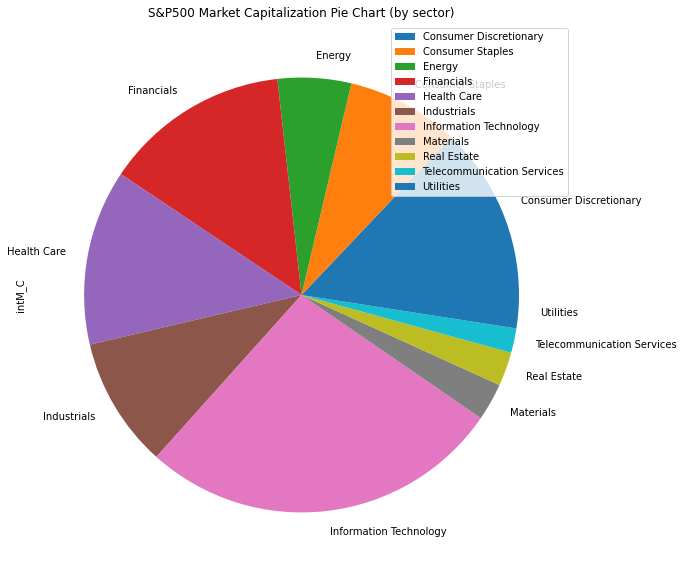

In [24]:
dq3.plot.pie(y='intM_C',figsize=(10,10)).set_title('S&P500 Market Capitalization Pie Chart (by sector)')

Text(0.5, 1.0, 'S&P500 Number of Companies Pie Chart (by sector)')

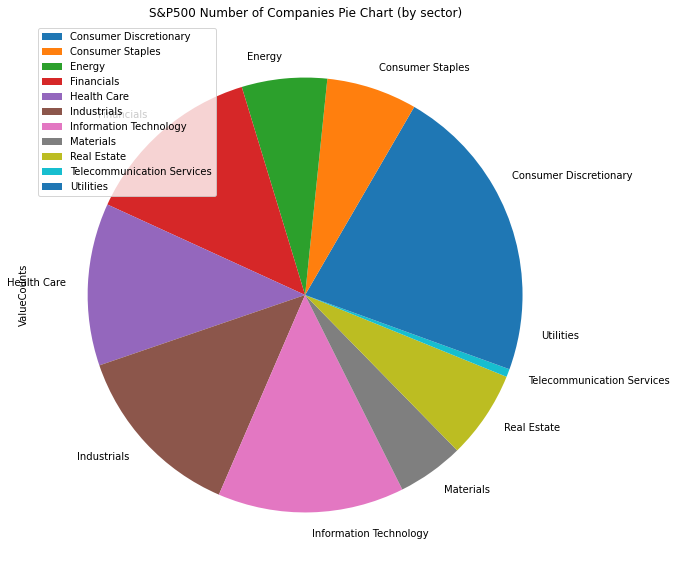

In [25]:
dq3.plot.pie(y='ValueCounts',figsize=(10,10)).set_title('S&P500 Number of Companies Pie Chart (by sector)')

At first glance, there seems to be very little differences between the two pie charts. The most significant difference is for Information Technology sector. Its market is significantly larger than the proportion of companeis present in the sector, this shows how much the U.S economy relies on IT based companies.

In [26]:
dq3['MeanPrice']=filtered_df.groupby('Sector').Price.mean().apply(lambda x:  round(x))

It was decided to further investigate the correlation between variables.

In [27]:
dq3.corr()

,intM_C,ValueCounts,MeanPrice
intM_C,1.000000,0.772564,0.686440
ValueCounts,0.772564,1.000000,0.795316
MeanPrice,0.686440,0.795316,1.000000


The correlation coefficients show that there is not a perfectly linear trend between market cap and number of companies. However, an interesting correlation was draw from sector size and the Mean Price of the sector. Which suggests that large sectors attract more investments, driving up the price. 

I will now attempt to connect all the variables and draw some trends:

In [28]:
dq3['MeanPER']=filtered_df.groupby('Sector').Price_Earnings_Ratio.mean().apply(lambda x:  round(x))
dq3['MeanBV']=filtered_df.groupby('Sector').Price_Book_Ratio.mean().apply(lambda x:  round(x))

In [29]:
dq3

,intM_C,ValueCounts,MeanPrice,MeanPER,MeanBV
Sector,,,,,
Consumer Discretionary,3213562747315,84,98,18,4
Consumer Staples,2087076388082,34,74,20,5
Energy,1357313712749,32,56,32,2
Financials,3442649464852,68,87,16,2
Health Care,3244359043367,61,119,19,4
Industrials,2411541173034,67,110,22,5
Information Technology,6727121800912,70,117,23,6
Materials,692300259151,25,93,22,5
Real Estate,625315677562,33,84,16,3


In [30]:
dq3.corr()

,intM_C,ValueCounts,MeanPrice,MeanPER,MeanBV
intM_C,1.000000,0.772564,0.686440,0.197747,0.445624
ValueCounts,0.772564,1.000000,0.795316,0.162072,0.195770
MeanPrice,0.686440,0.795316,1.000000,0.198809,0.511496
MeanPER,0.197747,0.162072,0.198809,1.000000,0.043630
MeanBV,0.445624,0.195770,0.511496,0.043630,1.000000


Text(0.5, 0.98, 'S&P 500 Cluster Map')

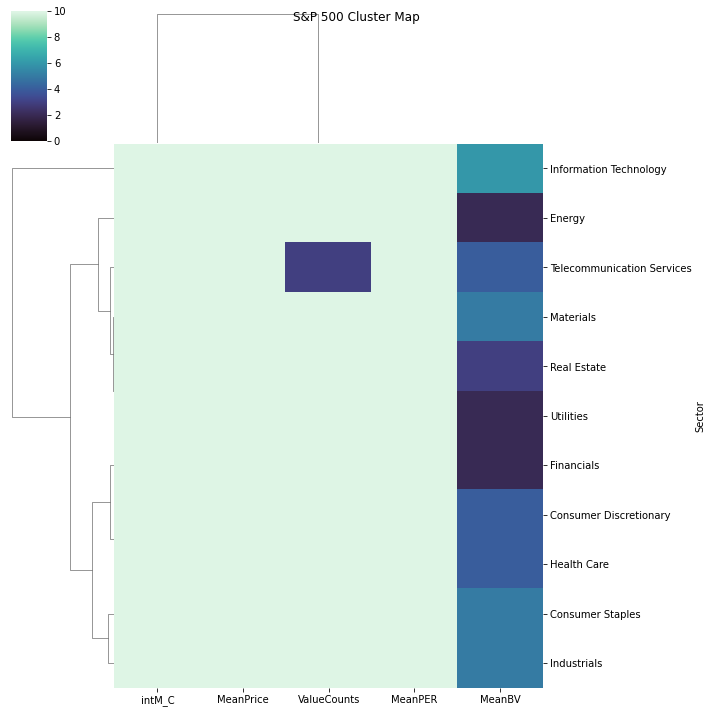

In [31]:
sns.clustermap(dq3, cmap="mako", vmin=0, vmax=10).fig.suptitle('S&P 500 Cluster Map')

Cluster map shows a connection between 'Materials' and 'Real Estate', which is a possible correlation. Another possible connection is between the industrial sector and the consumer staples, because the industrial sector usually produces products for the consumer staples sector. A more questionable relationship with no direct connect is between the 'Financial' and the 'Consumer Discretionary' sectors.

# Part 4:

In conclusion, my data analysis has provided a lot of key information about the S&P 500 companies. The main findings have been outlined as text throughout the project. In the final part of my report, this information will be summed up and analysed. Furthermore, important conclusions will be drawn on the technique to choose a stock portfolio. 
In conclusion, my data analysis has provided a lot of key information about the S&P 500 companies. The main findings have been outlined as text throughout the project. In the final part of my report, this information will be summed up and analysed. Furthermore, important conclusions will be drawn on the technique to choose a stock portfolio. 

First and foremost, during Task 1, the descriptive statistics showed extreme-value anomalies within the data. The boxplots plotted further emphasized this trend within the data. Thereby, it was decided to create a filter(based on the IQR), through which my project removed 89 companies from the 504 data points. After passing on the data through the filter algorithms, the standard deviation was significantly reduced. The boxplots produced after data filtration process demonstrated that for all 4 parameters (BV, PER, EPR and PSR) the boxplots illustrated the information more adequetly. This suggests that the anomalous companies were anomalies for all (or most) of the parameters. This suggests a key insight about the data, when a companies is an outlier for one of the parameters, it is likely to be an outlier for all of its financial information. Furthermore, after filtration it was observed that the boxplot for BV has similar distribution to the boxplot for PSR, (and vice versa for the other two parameters) this allowed us to for two grouped boxplot representation. The similarity has also allowed the project to consider only one parameter from each group namely: BV & PER. 

During task 3(part 1) my project addressed the sector-wise variation within the data. The histograms plotted using seaborn module illustrated that indeed, there is a difference in the distribution for PER and BV depending on the sector in question. For PER most sectors follow a normal distribution and the mean PER varies slightly within each sector. On the other hand, sectors such as 'Telecommunications Services(TS)' and 'Information Technology(IT)' did not quite follow with the trend. However, an explanation can be drawn from Task 3, part 2. One of the reasons for which TS did not follow the trend could be that the sector only has 3 companies within itself. Thereby, due to such a small population within the sector, the trend did not properly form. My project will neglect this sector for the portfolio choosing, as no trend was drawn. Regarding the IT sector, more in depth analysis was required, which was fortunately provided by Task 2, part 3. In the pie chart it was clear that IT cumulative market cap is significantly larger than the number of companies present in the sector. This suggests that there are some very large companies present in the sector. Which could be an explanation for the skew in PER ratio. With respect to BV, the data showed that generally in each sector there is a skew due to the presence of some companies with higher BV. These trend in PER and BV will be kept in mind during the choosing of my portfolio. 

At the same time, during task 3(part 2) my project was initially addressing the behaviour of market cap with respect to sector size. However, due to important correlation findings this question was further developed to look for overall trends in the data. The results of this study can be considered 'questionable' or 'interesting' (depends how you look at the situation xD). At first, after plotting two pie charts (of data that you would usually expect to have linear correlation) my project has discovered that the IT sector takes up a larger proportion of the pie chart than in the sector-size pie chart. This demonstrates that the U.S economy relies heavily on its IT companies. Furthermore, after measuring the correlation it was discovered that the correlation is not perfectly linear, an unexpected result. This led the project onto a study of how mean price, PER, BV and other parameters correlate with the initial results. The cluster map produced as a result demonstrated on the one hand 'common sense' relationships within the data (like the similarity of the 'Materials', 'Real Estate' and 'Energy' sector), on the other a questionable relationship was posed between the 'Financial' and 'Consumer Discretionary' sectors. With my existing knowledge I do not see how these two sectors can be related to each other, therefore it is difficult to draw any conclusions from the cluster map. I will not use the results from this study in choosing the stock-market portfolio. 

Overall, I believe that some important conclusions can be drawn from the project, and the data analysis. most importantly, is that I successfully implemented Pandas library, Seaborn Library and Matplotlib in the successful data analysis methods. As a cherry on the pie I will do an extra task 5*, and complete the project by generating a stock market portfolio! 

# Task 6*:

For the choosing of the stock market porfolio I will consider companies from all sectors excluding the IT and TS. I will generate a list of companies in each sector that is 0.005 standard deviation or less away from the mean, for the PER value. on the other hand due to the skewness of the data in BV, I will consider companies that are 0.005 s.d below the mean and 0.01 s.d above the mean. 

Filtration for PER and BV:

In [32]:
filtered_df_123=filtered_df.reset_index(drop=True)

groups = filtered_df_123.groupby('Sector')
filtered_df_123 = groups.apply(lambda x: x[x['Price_Book_Ratio']>= Mean(x['Price_Book_Ratio']-0.005*StDeviation(x['Price_Book_Ratio']))])

filtered_df_123=filtered_df_123.reset_index(drop=True)
groups = filtered_df_123.groupby('Sector')
filtered_df_123 = groups.apply(lambda x: x[x['Price_Book_Ratio']<= Mean(x['Price_Book_Ratio']+0.01*StDeviation(x['Price_Book_Ratio']))])

In [33]:
filtered_df_1234=filtered_df_123.reset_index(drop=True)

groups = filtered_df_1234.groupby('Sector')
filtered_df_1234 = groups.apply(lambda x: x[x['Price_Earnings_Ratio']>= Mean(x['Price_Earnings_Ratio']-0.005*StDeviation(x['Price_Earnings_Ratio']))])

filtered_df_1234=filtered_df_1234.reset_index(drop=True)
groups = filtered_df_1234.groupby('Sector')
filtered_df_RES = groups.apply(lambda x: x[x['Price_Earnings_Ratio']<= Mean(x['Price_Earnings_Ratio']+0.005*StDeviation(x['Price_Earnings_Ratio']))])
filtered_df_RES=filtered_df_RES.reset_index(drop=True)

In [34]:
len(filtered_df_RES)

34

In [35]:
filtered_df_RES

,Name,Sector,Price,Price_Earnings_Ratio,Dividend_Yield,Earnings_Share_Ratio,Market_Cap,Price_Sales_Ratio,Price_Book_Ratio
0,Best Buy Co. Inc.,Consumer Discretionary,68.79,19.22,1.908504,3.81,2.083119e+10,0.767155,4.79
1,Hasbro Inc.,Consumer Discretionary,96.48,20.57,2.230483,4.34,1.273207e+10,3.237568,5.82
2,Leggett & Platt,Consumer Discretionary,43.99,17.88,3.145478,2.76,6.034600e+09,2.030290,4.89
3,Tractor Supply Company,Consumer Discretionary,65.94,19.57,1.603087,3.30,8.459271e+09,1.164213,6.01
4,Church & Dwight,Consumer Staples,47.38,24.42,1.836605,2.92,1.183896e+10,3.168245,6.28
5,Coca-Cola Company (The),Consumer Staples,43.10,22.80,3.321364,1.49,1.898553e+11,6.822138,8.65
6,McCormick & Co.,Consumer Staples,101.36,23.91,2.026106,3.73,1.345935e+10,2.778828,5.20
7,Schlumberger Ltd.,Energy,67.40,44.93,2.867383,-1.08,9.652931e+10,3.229783,2.64
8,Williams Cos.,Energy,28.56,48.41,4.000000,-0.57,2.480240e+10,4.298285,3.01
9,"Nasdaq, Inc.",Financials,75.21,17.78,1.967128,4.32,1.284430e+10,3.259108,2.25


Creating new table to look at the results:

In [36]:
sample = filtered_df_RES.sample(n=10)[['Sector','Name','Price', 'Dividend_Yield']]
sample
#Sample differs every time the code is run, this was the only way to produce a random sample.
#The drawback is that after this code is run, everything has to be done manually. 

,Sector,Name,Price,Dividend_Yield
15,Health Care,United Health Group Inc.,216.46,1.328492
1,Consumer Discretionary,Hasbro Inc.,96.48,2.230483
31,Utilities,DTE Energy Co.,98.49,3.555959
13,Health Care,Boston Scientific,25.20,0.000000
26,Information Technology,Xilinx Inc,62.82,2.090488
9,Financials,"Nasdaq, Inc.",75.21,1.967128
23,Information Technology,Microsoft Corp.,85.01,1.874791
18,Industrials,Fortive Corp,69.14,0.390571
32,Utilities,Sempra Energy,103.36,3.160726
3,Consumer Discretionary,Tractor Supply Company,65.94,1.603087


As my sample company with indices (16,6,26,24,29,14,4,5,17) were selected from 'filtered_df_RES'. I have handpicked the Price Values from google, however Libraries such as BS4 can be used to do this automatically. 

In [37]:
resu = pd.DataFrame()
resu['Name']=['Emerson Electric','McCormick&Co','Xilinx Inc','Texas Instruments','Boston Properties', 'Hologic','Church&Dwight','Coca Cola','Expeditors International']
resu['Price03_11_21']=[90.38,87.01,218.7,193.58,110.49,73.77,91.06,53.07,122.6]
#I have realised that the intial data for July 2020 is incorrect, thereby I am going to change the 
# columns so that they represent the data of July 2020 as stated in the original information file.
resu['Price02_07_20']=[61.65,90.81,99.14,125.81,91.55,57.86,78.29,44.88,77.15]
resu['PERCENT_CHANGE'] =((resu['Price03_11_21']- resu['Price02_07_20'])/resu['Price02_07_20'])*100
resu



,Name,Price03_11_21,Price02_07_20,PERCENT_CHANGE
0,Emerson Electric,90.38,61.65,46.601784
1,McCormick&Co,87.01,90.81,-4.184561
2,Xilinx Inc,218.70,99.14,120.597135
3,Texas Instruments,193.58,125.81,53.866942
4,Boston Properties,110.49,91.55,20.688149
5,Hologic,73.77,57.86,27.497408
6,Church&Dwight,91.06,78.29,16.311151
7,Coca Cola,53.07,44.88,18.248663
8,Expeditors International,122.60,77.15,58.911212


In [38]:
PC = Mean(resu.PERCENT_CHANGE)
PC

39.83754251520983

In [39]:
SP500_02_07_20 = 3130
SP500_03_11_21 = 4529
PCSP500 = (SP500_03_11_21-SP500_02_07_20)/SP500_02_07_20*100
PCSP500

44.6964856230032

My stocks have achieved a cumulative of 40% increase, compared to 45% increase in the S&P 500 stocks total over the same period. I think this is a relatively satisfactory result, taking into account the fact that no deep human analysis methods were implemented. Furthermore, it is highly likely that the data source is unreliable, because the values it provides does not suit the trends for the 2020 July Period stock prices. 

*The comparison made was with respect to the 2020 July Prices*.

With dividend payments included:

In [40]:
resu['Dividend']=[2.8, 2.02, 2.09, 2.43, 2.77, 0, 1.83, 3.32, 1.35]
PT = PC + Mean(resu.Dividend)
PT

41.90532029298761

When the dividend is included, we get a 41% increase compared to 45% in the market. Which is just 4% worse than the market, and a very satisfactory result considering a 100,000$ investment into the stock sample above. 

A step further was taken to determine the original date, when the stock market measurements were made: By studying the presented stock prices, it is probable that the data dates back to 2017(looking at when companies had the presented stock price). Now I am going to compare my results against the market growth from 2017. 

Now I am going to compare my results against the market growth from 2017:

In [41]:
resu2 = pd.DataFrame()
resu2['Price03_11_21']=[90.38,87.01,218.7,193.58,110.49,73.77,91.06,53.07,122.6]
resu2['Price2017'] = [66.4,101.36,62.82,97.66,112.09, 38.8,47.38,43.10,60.36]
resu2['PERCENT_CHANGE'] =((resu2['Price03_11_21']- resu2['Price2017'])/resu2['Price2017'])*100
resu2

,Price03_11_21,Price2017,PERCENT_CHANGE
0,90.38,66.40,36.114458
1,87.01,101.36,-14.157459
2,218.70,62.82,248.137536
3,193.58,97.66,98.218308
4,110.49,112.09,-1.427424
5,73.77,38.80,90.128866
6,91.06,47.38,92.190798
7,53.07,43.10,23.132251
8,122.60,60.36,103.114645


In [42]:
PC = Mean(resu2.PERCENT_CHANGE)
PC

75.05021988169216

In [44]:
SP500_2017_Jan = 2270
PCSP500_2 = (SP500_03_11_21-SP500_2017_Jan)/SP500_2017_Jan*100
SP500_2017_June = 2439
PCSP500_3 = (SP500_03_11_21-SP500_2017_June)/SP500_2017_June*100
SP500_2017_Dec = 2673
PCSP500_4 = (SP500_03_11_21-SP500_2017_Dec)/SP500_2017_Dec*100
PCSP500_2017 = pd.DataFrame([PCSP500_2,PCSP500_3,PCSP500_4])
PCSP500_2017.mean()


0    84.880456
dtype: float64

Through the price of S&P 500 taken at different time periods in 2017, it is highly likely that my algorithm still slightly underperforms the overall market trend. However, this algorithm can be further tuned with more advanced techniques, and the fact that it under-performs just slightly(without taking into account any dividend profits), demonstrates the prospects of Data Science for Investments and creation of a personalised stock market porfolio. Furthermore, I truly believe that with a some human decision-making in the process of choosing and monitoring one's stock market portfolio it is highly likely that the percentage change can be increased. My program thereby provides for a good base of companies that an investor should consider investing in. p.s Dividends were not included in the last measurements. If we add 2% over a 4-year period, the result becomes very similar to the market. Of course, more samples have to be taken (maybe it was just a lucky guess or a coincidence...) Nonetheless, companies like Microsoft and Facebook are in my stock-pool. (and they skyrocketed since 2017 ;). 

# Appendix:

In [45]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /Users/iskandersergazin/Desktop/.git/
